In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist

# Importing the dataset

In [71]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Shape of datasets:\nX_train -> {}\ny_train -> {}\nX_test -> {}\ny_test -> {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shape of datasets:
X_train -> (60000, 28, 28)
y_train -> (60000,)
X_test -> (10000, 28, 28)
y_test -> (10000,)


The dataset consists of handwritten digits.  
Training set consists of 60,000 images of shape 28x28, while test set consists of 10,000 images.

# Visualizing the digits

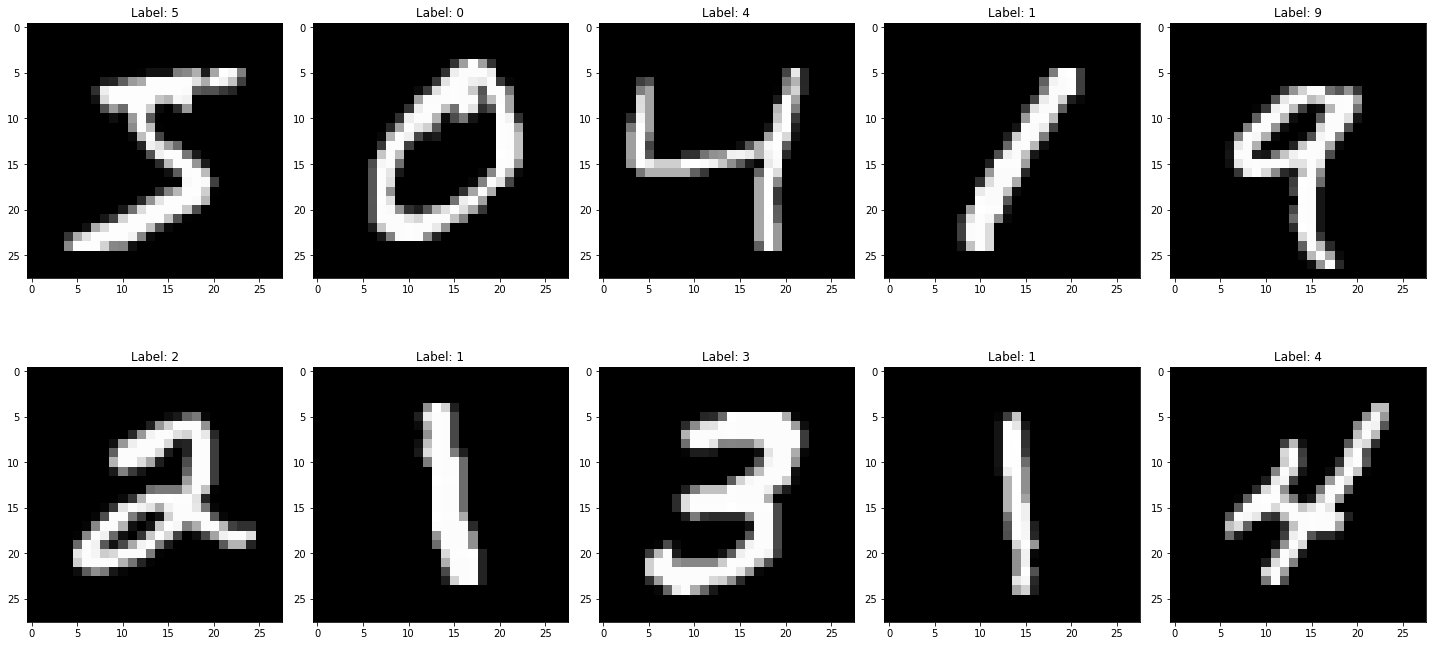

In [16]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

index = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X_train[index], cmap='gray')
        ax[i][j].set_title('Label: {}'.format(y_train[index]))
        index += 1

plt.tight_layout()
plt.show()

We can visualize the digits using matplotlib, and confirm that the dataset actually makes sense.  
So now we can move to data proprocessing.

# Data Preprocessing

We will be preprocessing the image by making sure that the pixels are in the range 0 to 1.  
By default, the values of the pixels are in the range 0 to 255, thus we can scale them by dividing by 255.  

First however, we will have to convert the datatype to float32 from uint8.

In [72]:
X_train = X_train.astype('float32')
X_train /= 255.

X_test = X_test.astype('float32')
X_test /= 255.

Now we can make sure that out labels are in the currect format.  
Since we are predicting from one out of 10 classes, we can encode the target variable using one-hot encoding to make it a vector of length 10.

In [73]:
y_train = tf.one_hot(y_train, 10).numpy()
y_test = tf.one_hot(y_test, 10).numpy()

# ML Modeling

For creating a model out for our project, we will be using the Sequential model.  
The model will consist of a linear stack of layers. The first layer would be the Flatten layer (with the default input layer) to convert the image to a linear vector.  
The the model would consist of a stack of dense layers with Rectified Linear activation function and dropout layers to create a neural network.  
The final layer would be a dense layer as well but a softmax activation function to convert the output to a probability distribution.

In [101]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 10)               

Now we can compile and fit the model on out training dataset.

We will be using the adam optimizer and the categorical crossentropy loss function to compile the model.
For fitting, we will run the model for 10 epochs, with a 20% validation split.

In [102]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
histrory = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3955 - accuracy: 0.8791 - val_loss: 0.1618 - val_accuracy: 0.9524
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1822 - accuracy: 0.9455 - val_loss: 0.1110 - val_accuracy: 0.9667
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1422 - accuracy: 0.9571 - val_loss: 0.1099 - val_accuracy: 0.9681
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1201 - accuracy: 0.9638 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1093 - accuracy: 0.9659 - val_loss: 0.0975 - val_accuracy: 0.9726
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0930 - accuracy: 0.9715 - val_loss: 0.0909 - val_accuracy: 0.9725
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.0925 - val_accuracy:

The model ended 10 epochs with a validation loss of 0.0972, and accuracy of 0.9742  
Let's now evaluate on the test set to ensure the model parameters.

In [104]:

score = model.evaluate(X_test, y_test)
print('Test loss: {:.3f}\nTest accuracy: {:.3f}'.format(score[0], score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0873 - accuracy: 0.9754
Test loss: 0.087
Test accuracy: 0.975


The model performs well on the testing dataset as well. Thus we can confirm that model is working as expected.

Let's look at the tends of loss and accuracy over the model training for some more insights.

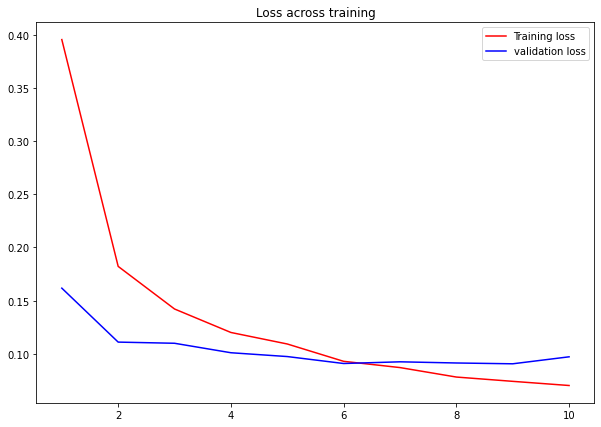

In [110]:
plt.figure(figsize=(10,7))

plt.plot(np.linspace(1, 10, 10), histrory.history['loss'], c='r', label='Training loss')
plt.plot(np.linspace(1, 10, 10), histrory.history['val_loss'], c='b', label='validation loss')

plt.legend()
plt.title('Loss across training')

plt.show();

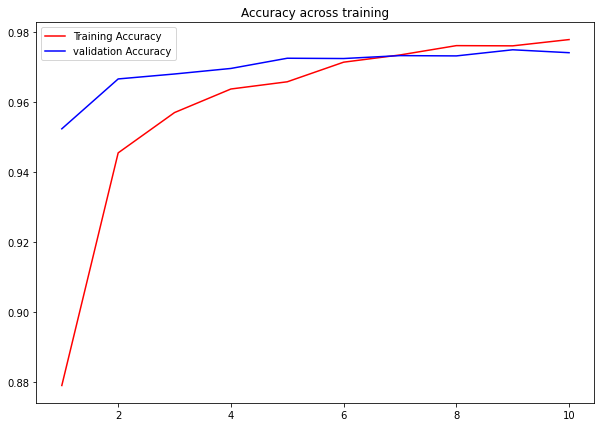

In [111]:
plt.figure(figsize=(10,7))

plt.plot(np.linspace(1, 10, 10), histrory.history['accuracy'], c='r', label='Training Accuracy')
plt.plot(np.linspace(1, 10, 10), histrory.history['val_accuracy'], c='b', label='validation Accuracy')

plt.legend()
plt.title('Accuracy across training')

plt.show();

# Predicting digits from images

Now let's finally, predict the digit from some sample images from the test set. We will be using the same model we trained earlier.

1/1 [==============================] - 0s 17ms/step


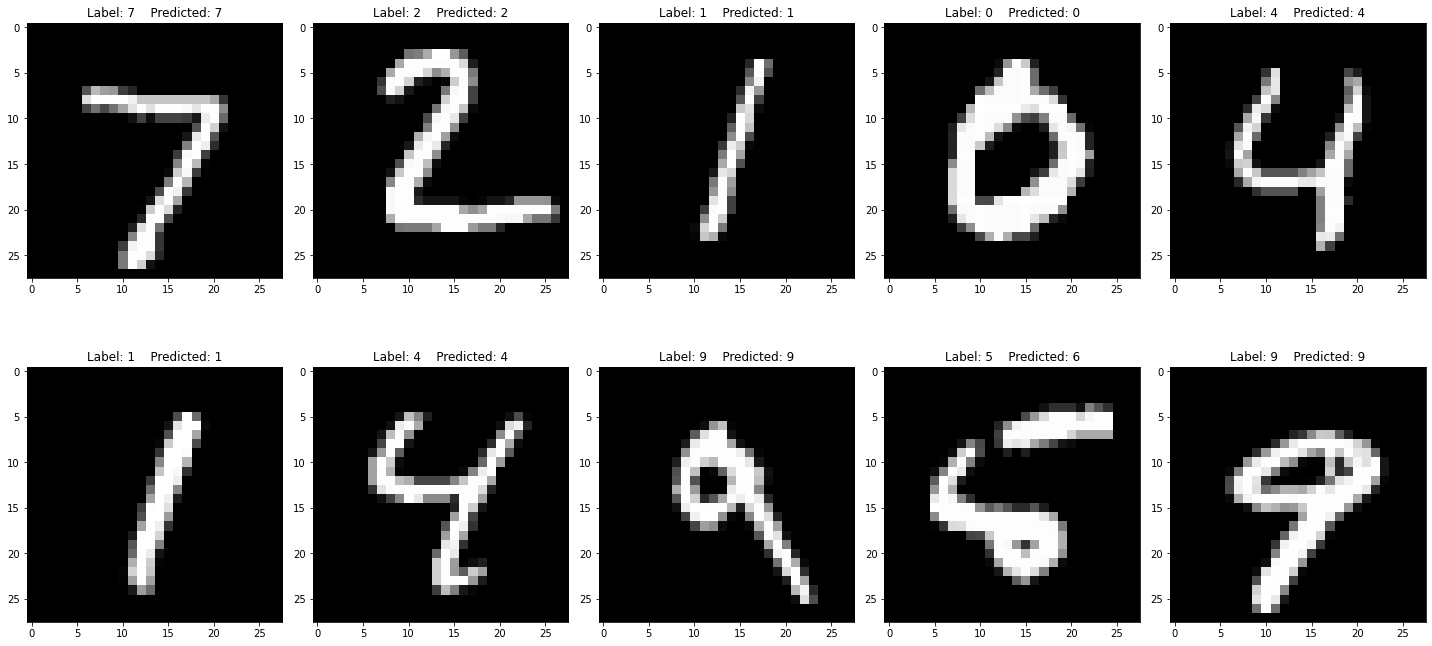

In [106]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

index = 0
for i in range(2):
    for j in range(5):
        ax[i][j].imshow(X_test[index], cmap='gray')
        ax[i][j].set_title('Label: {}    Predicted: {}'.format(np.argmax(y_test[index]), np.argmax(model.predict(X_test[index:index+1])[0])))
        index += 1

plt.tight_layout()
plt.show();

To conclude the project, we used a Feed-Forward Neural Network to extract a accuracy of 97.5% 